Problem Statement: Bank Churn Prediction
-------------------------------------------------------------------------------------------------------------------------
Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.
Context:
Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.
Data Description:
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project
site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Points Distribution:
The points distribution for this case is as follows:
    
• Read the dataset
• Drop the columns which are unique for all users like IDs (5points)
• Distinguish the features and target variable(5points)
• Divide the data set into training and test sets (5points)
• Normalize the train and test data (10points)
• Initialize & build the model. Identify the points of improvement and implement the
same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)
• Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)
• Print the Accuracy score and confusion matrix (5points)

In [2]:
#!pip install tensorflow==2.0
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
# reading the CSV file into pandas dataframe
bank_df= pd.read_csv("bank.csv")  

pd.isnull(bank_df).count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [4]:
bank_df['Exited'].mean()
#The average value of the target value is 0.2, which means that 20% of custumer actually "Churn"

0.2037

In [5]:
bank_df.isnull().values.any() #Check if there is any null entry in the data; the answer is no

False

In [6]:
bank_df.duplicated(subset=None, keep='first')
bank_df.shape#check for duplicate rows after removing RowNumber

(10000, 14)

In [7]:
#Drop unnecessary columns
bank_df  = bank_df.drop(['RowNumber','CustomerId','Surname'], axis=1)
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
bank_df['Geography'].unique()#Check for unique values in column of Geography

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
bank_df['Gender'].unique()#Check for unique values in column of Gender

array(['Female', 'Male'], dtype=object)

In [10]:
bank_df['Tenure'].unique()#Check for unique values in column of Tenure

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [11]:
bank_df['NumOfProducts'].unique()#Check for unique values in column of NumOfProducts

array([1, 3, 2, 4])

In [12]:
bank_df['HasCrCard'].unique()

array([1, 0])

In [13]:
bank_df['Exited'].unique()

array([1, 0])

In [14]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# convert the Gender to numeric values using one-hot code 

bank_df = pd.get_dummies(bank_df, columns=['Gender'],drop_first=True)
bank_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


In [16]:
#convert Geography to numric values (but that will introduce an order in that column)

bank_df['Geography'] = bank_df['Geography'].map(lambda x: {"France":0, "Spain":1, "Germany":2}.get(x))

#dict = {"France":0, "Spain":1,  "Germany":2}# Alternative ways of converting to numeric values
#bank_df['Geography'].replace(dict, inplace=True)
#bank_df.head(10)
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# label_X_country_encoder = LabelEncoder()
# bank_df['Geography'] = label_X_country_encoder.fit_transform(bank_df['Geography'])
# countryhotencoder = ColumnTransformer([("countries", OneHotEncoder(), ['Geography'])], remainder="passthrough")

# bank_df['Gender'] = label_X_country_encoder.fit_transform(bank_df['Gender'])
# bank_df = countryhotencoder.fit_transform(bank_df)


In [17]:
bank_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0


In [18]:
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs

import warnings
warnings.filterwarnings('ignore')

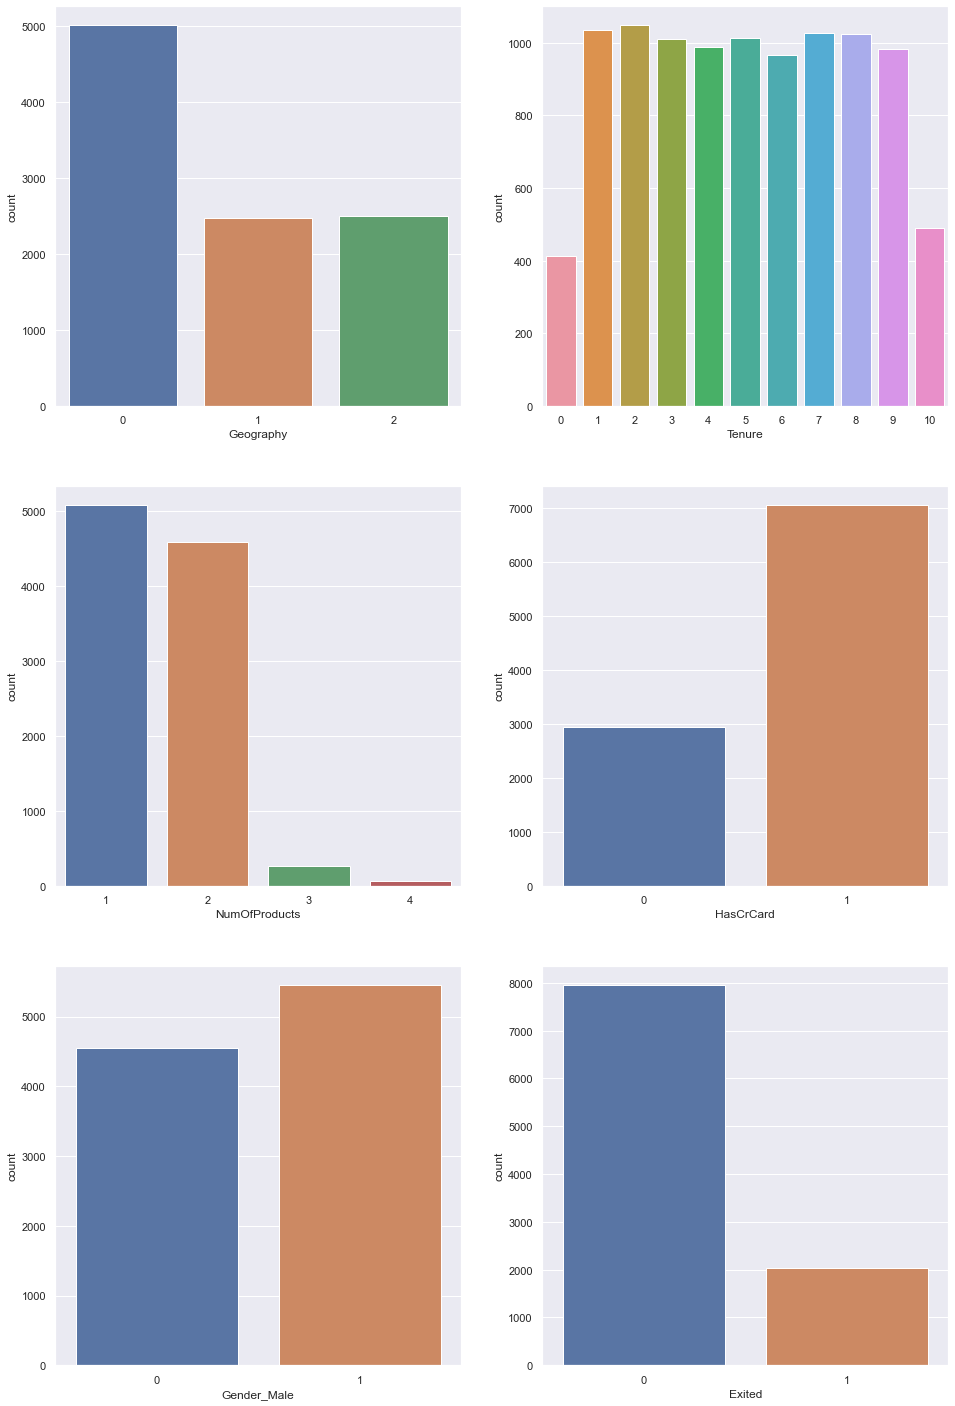

In [19]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(3,2,figsize=(16,25))
sns.countplot(bank_df['Geography'], ax=ax[0,0]);
sns.countplot(bank_df['Tenure'], ax=ax[0,1]);
sns.countplot(bank_df['NumOfProducts'], ax=ax[1,0]);
sns.countplot(bank_df['HasCrCard'], ax=ax[1,1]);
sns.countplot(bank_df['Gender_Male'], ax=ax[2,0]);
sns.countplot(bank_df['Exited'], ax=ax[2,1]);
plt.rcParams["axes.labelsize"] = 20
fig.show()

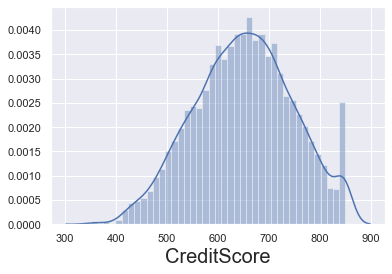

In [20]:
sns.distplot(bank_df['CreditScore']);

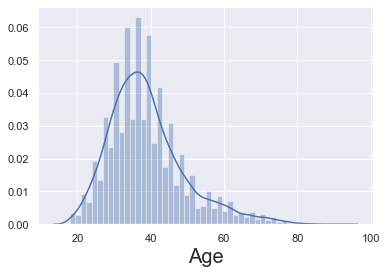

In [21]:
sns.distplot(bank_df['Age']);

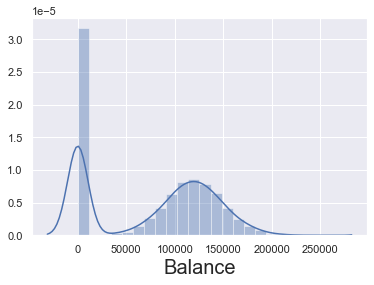

In [22]:
sns.distplot(bank_df['Balance']);

In [23]:
bank_df.min(axis=0)#Get the minimum value in each column and confirm Balance minimum is 0

CreditScore        350.00
Geography            0.00
Age                 18.00
Tenure               0.00
Balance              0.00
NumOfProducts        1.00
HasCrCard            0.00
IsActiveMember       0.00
EstimatedSalary     11.58
Exited               0.00
Gender_Male          0.00
dtype: float64

In [24]:
#Count number of zeros in the Balance column
(bank_df.Balance == 0).sum(axis=0)

3617

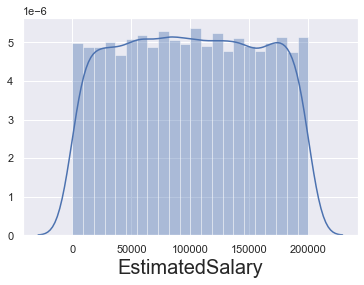

In [25]:
sns.distplot(bank_df['EstimatedSalary']);

In [26]:
bank_df.shape

(10000, 11)

In [27]:
bank_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0


In [28]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=bank_df.drop(columns='Exited')

# Specify the target labels and flatten array
y= bank_df['Exited']


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [29]:
X_train.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
9069,619,1,32,4,175406.13,2,1,1,172792.43,0
2603,643,2,34,7,160426.07,1,0,1,188533.11,0
7738,561,0,33,6,0.00,2,0,0,173680.39,1
1579,618,2,41,8,37702.79,1,1,1,195775.48,1
5058,714,0,37,9,148466.93,2,0,1,151280.96,1


In [30]:
bank_df['Exited'].sum()/10000
##double check the target variable value

0.2037

In [33]:
y_train.mean()#Check the target value for the training dataset

0.20757142857142857

In [34]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [37]:
ncols=X_train.shape[1]#Get the number of columns from the X training set 

In [38]:
ncols

10

# Start the model

In [40]:
# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Initialize the constructor
model_1 = Sequential()

model_1.add(Dense(64, input_shape = (ncols,), activation = 'elu'))#Add a first hidden layer
model_1.add(Dense(32, activation = 'relu'))## second hidden layer
model_1.add(Dense(1, activation = 'sigmoid'))## Add an output layer with one neuron and no activation specified


## Model compile [optimizers and loss functions]
Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated

In [41]:
from tensorflow.keras import optimizers

sgd = optimizers.Adam(lr = 0.001)


In [42]:
model_1.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

## Summary of the model

In [43]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [44]:
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt


## Training [Forward pass and Backpropagation]¶
Training the model

In [45]:
model_1.fit(X_train, y_train, batch_size = 500, epochs = 10, verbose = 1)

Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 2s 220us/sample - loss: 0.6468 - accuracy: 0.6431
Epoch 2/10
7000/7000 [==============================] - 0s 8us/sample - loss: 0.5309 - accuracy: 0.8103
Epoch 3/10
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4741 - accuracy: 0.8160
Epoch 4/10
7000/7000 [==============================] - 0s 8us/sample - loss: 0.4439 - accuracy: 0.8200
Epoch 5/10
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4281 - accuracy: 0.8221
Epoch 6/10
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4185 - accuracy: 0.8261
Epoch 7/10
7000/7000 [==============================] - 0s 8us/sample - loss: 0.4115 - accuracy: 0.8289
Epoch 8/10
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4054 - accuracy: 0.8329
Epoch 9/10
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3991 - accuracy: 0.8347
Epoch 10/10
7000/7000 [=================

In [46]:
X_test = preprocessing.normalize(X_test)

In [47]:
results = model_1.evaluate(X_test, y_test)

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [48]:
print(model_1.metrics_names)
print(results)  

['loss', 'accuracy']
[0.4445205851395925, 0.81766665]


## Confusion Matrix

In [59]:
Y_pred_cls = model_1.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model_1.evaluate(X_test,y_test)[1]))

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy Model1 (Dropout): 0.81766665


In [60]:
#Printout the model scores and confusion matrix of the base model
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

Recall_score: 0.07363013698630137
Precision_score: 0.8775510204081632
F-score: 0.1358609794628752


array([[2410,    6],
       [ 541,   43]])

In [51]:
model_1.predict(X_test)

array([[0.26275733],
       [0.19807342],
       [0.3382427 ],
       ...,
       [0.14335757],
       [0.17294201],
       [0.26137125]], dtype=float32)

#The accuracy and precision scores are OK, but the recall score is too low. We need to figure out a way to increase the recall score to balance these parameter. We should probably reduce the probability threshold to predict the positive class more often.

## Build an improved model

In [52]:
#restart the process of loading data and cleaning the data
bank_df= pd.read_csv("bank.csv")  
bank_df  = bank_df.drop(['RowNumber','CustomerId','Surname'], axis=1)
bank_df = pd.get_dummies(bank_df, columns=['Gender'],drop_first=True)
bank_df['Geography'] = bank_df['Geography'].map(lambda x: {"France":0, "Spain":1, "Germany":2}.get(x))
X=bank_df.drop(columns='Exited')
y= bank_df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y_train =  np.array(y_train)
y_test =  np.array(y_test)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
#Construct an improved model
model_improved = Sequential()
model_improved.add(Dense(512, input_shape = (10,), activation = 'elu'))
model_improved.add(Dense(256, activation = 'relu'))## second hidden layer
model_improved.add(Dense(1, activation = 'sigmoid'))## Add an output
sgd = optimizers.Adam(lr = 0.001)
model_improved.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])
model_1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [54]:
#Train the improved model
model_improved.fit(X_train, y_train, batch_size = 200, epochs = 20, verbose = 0)

In [55]:
#Evaluate the improved model
X_test = preprocessing.normalize(X_test)
results = model_improved.evaluate(X_test, y_test)
print(model_improved.metrics_names)
print(results)
Y_pred_cls = model_improved.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model_improved.evaluate(X_test,y_test)[1]))


3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

['loss', 'accuracy']
[0.44545074431101483, 0.822]
3000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy Model1 (Dropout): 0.822
Recall_score: 0.2791095890410959
Precision_score: 0.5905797101449275
F-score: 0.37906976744186044


array([[2303,  113],
       [ 421,  163]])

In [57]:
#Pint out the score of the improved model and the confusion matrix
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

Recall_score: 0.2791095890410959
Precision_score: 0.5905797101449275
F-score: 0.37906976744186044


array([[2303,  113],
       [ 421,  163]])

#Attempted to increase the # of neurons in the first two layers and increase the recall score a little bit. Also attempted to change the activation functions, the combination used in the base model seems to give the best result; Decreased the "batch_size" from 500 to 200 and increased "epochs" from 10 to 20, it seems to help the model perform better

In [79]:
prob_score = model_1.predict(X_test)
prob_score.mean()

0.2745096

In [80]:
threshold = 0.3
predicted_label = prob_score >= threshold

In [81]:
#predicted_label[0:20]

In [82]:
precision_score(y_test,predicted_label), recall_score(y_test,predicted_label)

(0.407088122605364, 0.7277397260273972)

In [83]:
confusion_matrix(y_test, predicted_label)

array([[1797,  619],
       [ 159,  425]])

#After changing the threshold based on the overall probality, the recall score has improved significantly

In [87]:
prob_score = model_improved.predict(X_test)
threshold = 0.20
predicted_label = prob_score >= threshold
confusion_matrix(y_test, predicted_label)

array([[ 899, 1517],
       [  36,  548]])

In [88]:
precision_score(y_test,predicted_label), recall_score(y_test,predicted_label)

(0.2653753026634383, 0.9383561643835616)

#After we change the threshold value to 0.2, the overall percentage of the actual exited customer to all customers, the recall score improved significantly. Though the precision score dropped significantly, it is tolerable. If you contact an non-exited customer like an exited customer, it is better than not being able to identify the real exited customers. 

## Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)

#Part of the task is just completed in the previous sessions, here I am just going to repeat the process

In [91]:
prob_score = model_improved.predict(X_test)
threshold = 0.50
predicted_label = prob_score >= threshold
confusion_matrix(y_test, predicted_label)

array([[2303,  113],
       [ 421,  163]])

In [92]:
precision_score(y_test,predicted_label), recall_score(y_test,predicted_label)

(0.5905797101449275, 0.2791095890410959)

## Print the Accuracy score and confusion matrix (5points)

In [93]:
accuracy_score(y_test,predicted_label)

0.822

In [94]:
confusion_matrix(y_test, predicted_label)

array([[2303,  113],
       [ 421,  163]])